<hr>

#### For KC Metric and KC indicator

<hr>

In [5]:
## For ani

## again 2 sympy in

import pandas as pd
import sympy as sp


plays = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/plays.csv') # plays_df
print('plays :', plays.shape)

tackles = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/tackles.csv')
print('tackles :', tackles.shape)

plays_tackles_merged = pd.merge(plays,tackles,on=['gameId','playId'],how='inner')
print('plays_tackles_merged :',plays_tackles_merged.shape)

    
    
indicator = {}
indicators = {}

indicators_animation = {}
t_nt = []

for week in range(1,10):
    
    print()
    print('--------------->') 
    print()


    week_i = week
    tracking_week_i = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/tracking_week_'+str(week_i)+'.csv')
    print('tracking_week_'+str(week_i), tracking_week_i.shape)
    
    plays_tackles_tracking_i_merged = pd.merge(plays_tackles_merged,tracking_week_i,on=['gameId','playId'],how='inner')
    print('plays_tackles_tracking_i_merged', plays_tackles_tracking_i_merged.shape)     
    
    
    for q in range(1,5) :
    
        quarter_j = q
        plays_tackles_tracking_i_merged_quarter_j = plays_tackles_tracking_i_merged[plays_tackles_tracking_i_merged['quarter']==quarter_j]
        print('quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape:', quarter_j, plays_tackles_tracking_i_merged_quarter_j.shape )
    
    
        dtype_dict = {'passResult':'str', 'foulName1':'str', 'foulName2': 'str'}
        plays_tackles_tracking_i_merged_quarter_j = plays_tackles_tracking_i_merged_quarter_j.astype(dtype_dict)
        print('week_i = ', week_i,'quarter_j = ', quarter_j)

        plays_tackles_tracking_i_merged_quarter_j_defence = plays_tackles_tracking_i_merged_quarter_j[plays_tackles_tracking_i_merged_quarter_j['nflId_x'] == plays_tackles_tracking_i_merged_quarter_j['nflId_y']]
        print('plays_tackles_tracking_i_merged_quarter_j_defence.shape',plays_tackles_tracking_i_merged_quarter_j_defence.shape)
        
        plays_tackles_tracking_i_merged_quarter_j_offence = plays_tackles_tracking_i_merged_quarter_j[(plays_tackles_tracking_i_merged_quarter_j['nflId_y'] == plays_tackles_tracking_i_merged_quarter_j['ballCarrierId'])]
        print('plays_tackles_tracking_i_merged_quarter_j_offence.shape', plays_tackles_tracking_i_merged_quarter_j_offence.shape)

        ## tackle and nontackle data  tac nt

        plays_tackles_tracking_i_merged_quarter_j_defence_tackle = plays_tackles_tracking_i_merged_quarter_j_defence[(plays_tackles_tracking_i_merged_quarter_j_defence['tackle'] == 1)]
        plays_tackles_tracking_i_merged_quarter_j_defence_nt = plays_tackles_tracking_i_merged_quarter_j_defence[(plays_tackles_tracking_i_merged_quarter_j_defence['tackle'] == 0)]

        plays_tackles_tracking_i_merged_quarter_j_offence_tackle = plays_tackles_tracking_i_merged_quarter_j_offence[(plays_tackles_tracking_i_merged_quarter_j_offence['tackle'] == 1)]
        plays_tackles_tracking_i_merged_quarter_j_offence_nt = plays_tackles_tracking_i_merged_quarter_j_offence[(plays_tackles_tracking_i_merged_quarter_j_offence['tackle'] == 0)]

        print('plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes', plays_tackles_tracking_i_merged_quarter_j_defence_tackle.shape,plays_tackles_tracking_i_merged_quarter_j_defence_nt.shape,plays_tackles_tracking_i_merged_quarter_j_defence_tackle.shape[0]+plays_tackles_tracking_i_merged_quarter_j_defence_nt.shape[0])
        print('plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes', plays_tackles_tracking_i_merged_quarter_j_offence_tackle.shape,plays_tackles_tracking_i_merged_quarter_j_offence_nt.shape,plays_tackles_tracking_i_merged_quarter_j_offence_tackle.shape[0]+plays_tackles_tracking_i_merged_quarter_j_offence_nt.shape[0])
    
        plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped = plays_tackles_tracking_i_merged_quarter_j_defence_tackle.groupby(['gameId', 'playId'])
        plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped = plays_tackles_tracking_i_merged_quarter_j_defence_nt.groupby(['gameId', 'playId'])

        plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped = plays_tackles_tracking_i_merged_quarter_j_offence_tackle.groupby(['gameId', 'playId'])
        plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped = plays_tackles_tracking_i_merged_quarter_j_offence_nt.groupby(['gameId', 'playId'])

        print('ngroups')
        print(plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped.ngroups, plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped.ngroups)
        print(plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped.ngroups, plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped.ngroups)
    
        
        import numpy as np
        import math
        from tqdm import tqdm

        from scipy.optimize import minimize

        
#         import sympy as sp
        def conics(params,x,y):
            a,b,c,d,e,f = params
            return a*x**2 + b*x*y + c*y**2 + d*x + e*y + f

        def objective_fn(params,x,y):
            return np.sum(conics(params,x,y)**2)


        groups = [('plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped', plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped),
                  ('plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped', plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped), 
                  ('plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped', plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped), 
                  ('plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped', plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped)]

#         indicator = {}
#         indicators = {}
        
    
#         gameid_ntac, playid_ntac = 2022110603, 3085
#         gameid_tac, playid_tac = 2022110609, 4162
    
    
#         indicators_ani = {}
        # for group  in groups :
        for group_name, group in groups : # group_name, group_data     
            print(group_name)
            eccs = []
            loss = []
            conics_type = []
            event_last = []
            theta = []
            coeffs = []
            lengths =  []
            accs = [] #added
            dis =  []
            i = 0
            
#             indicators_ani[group_name] = {}
            indicators_animation[group_name] = {}
            for (gameId, playId), group_data in tqdm(group) :
                
                i +=1

                for k in range(len(group_data['event'])-1,0,-1): 
                    if(str(group_data['event'].iloc[k])!='nan'):

                        lengths.append(len(group_data))

                        l=80 
                        if len(group_data) >= l :# 60 
                            x= group_data['x'][-l:k+1].tolist()  
                            y= group_data['y'][-l:k+1].tolist()
                            s = group_data['s'][-l:k+1].tolist()  
                            acc = group_data['a'][-l:k+1].tolist()
                            o = group_data['o'][-l:k+1].tolist()  
                            direc = group_data['dir'][-l:k+1].tolist()
#                             alined_direc = direc[1:]
                            cos_direc, sin_direc = np.cos(direc), np.sin(direc)
                            sx,sy = s*cos_direc, s*sin_direc
                            lengths.append(len(group_data))

                            dis = group_data['dis'][-l:k+1].tolist()
                            alined_direc = direc[1:]
                        else :
                            x= group_data['x'][5:k+1].tolist() 
                            y= group_data['y'][5:k+1].tolist()
                            s = group_data['s'][5:k+1].tolist()
                            acc = group_data['a'][5:k+1].tolist()
                            o = group_data['o'][5:k+1].tolist()  
                            direc = group_data['dir'][5:k+1].tolist()
                            cos_direc, sin_direc = np.cos(direc), np.sin(direc)
                            sx,sy = s*cos_direc, s*sin_direc
                            dis = group_data['dis'][5:k+1].tolist()
                            aligned_direc = direc[1:]

                        break 


                x_pos = np.array(x) 
                y_pos = np.array(y)
                s = np.array(s)
                acc = np.array(acc)
                o = np.array(o)
                direc = np.array(direc)
                aligned_direc = np.array(direc[1:]) #[1:]
                
                dx, dy = np.diff(x_pos), np.diff(y_pos)
                
    
    
                # init_guess = [1,1,1,1,1,1]
                p0 = [1,1,1,1,1,1]

                params = minimize(objective_fn, p0, args=(x_pos,y_pos))
                params_v = minimize(objective_fn, p0, args=(sx,sy))
                a,b,c,d,e,f = params.x
                coeffs.append((a,b,c,d,e,f))
            
                a_v,b_v,c_v,d_v,e_v,f_v = params_v.x
            
                
                
                # define the symbols
#                 x, y = sp.symbols('x y')
#                 x_prime, y_prime = sp.symbols('x_prime y_prime')
#                 x_new, y_new = sp.symbols('x_new y_new')
                
                theta_ = np.arctan2(b,a-c)/2
                cos_theta_, sin_theta_ = np.cos(theta_), np.sin(theta_)
                
                a_prime = a*cos_theta_**2 +  b*cos_theta_*sin_theta_ +  c*sin_theta_**2
                b_prime = 2*(c-a)*cos_theta_*sin_theta_ + b*(cos_theta_**2 -sin_theta_**2)
                c_prime = a*sin_theta_**2 - b*cos_theta_*sin_theta_ + c*cos_theta_**2
                d_prime = d*cos_theta_ + e*sin_theta_
                e_prime = -d*sin_theta_ + e*cos_theta_
                f_prime =  f
                
                x_coeff_std, x_cen, y_coeff_std, y_cen, const_std = a_prime, d_prime/(2*a_prime), c_prime, e_prime/(2*c_prime), (-f_prime + a_prime*(d_prime/(2*a_prime))**2 + c_prime*(e_prime/(2*c_prime))**2)
                a_check, c_check = const_std/x_coeff_std, const_std/y_coeff_std 
                
                a_prime_v = a*cos_theta_**2 +  b*cos_theta_*sin_theta_ +  c*sin_theta_**2
                b_prime = 2*(c-a)*cos_theta_*sin_theta_ + b*(cos_theta_**2 -sin_theta_**2)
                c_prime_v = a_v*sin_theta_**2 - b*cos_theta_*sin_theta_ + c*cos_theta_**2
                d_prime = d*cos_theta_ + e*sin_theta_
                e_prime = -d*sin_theta_ + e*cos_theta_
                f_prime =  f
                x_coeff_std_v, x_cen_v, y_coeff_std_v, y_cen_v, const_std_v = a_prime, d_prime/(2*a_prime), c_prime, e_prime/(2*c_prime), (-f_prime + a_prime*(d_prime/(2*a_prime))**2 + c_prime*(e_prime/(2*c_prime))**2)
                a_check, c_check = const_std/x_coeff_std, const_std/y_coeff_std 
                
                a_prime_,b_prime_, c_prime_,d_prime_,e_prime_,f_prime_ = sp.symbols('a_prime_,b_prime_, c_prime_,d_prime_,e_prime_,f_prime_')

                D = b**2 -4*a*c
                
                cost = np.cos(np.arctan2(b,a-c)/2)
                sint = np.sin(np.arctan2(b,a-c)/2)
                theta.append(np.arctan2(b,a-c)/2)

                accs.append(np.mean(acc)) 
                # Metric : KC Index 
                eccs.append(   (  (((a_prime*c_prime))) *np.cos(np.mean(direc))*np.mean(s)*np.mean(acc)*((len(x_pos)*.01)**3) *np.cos(np.mean(o)) ) )
                indicators_animation[group_name][(gameId, playId)] = (  (((a_prime*c_prime))) *np.cos(np.mean(direc))*np.mean(s)*np.mean(acc)*((len(x_pos)*.01)**3) *np.cos(np.mean(o)) )
        

            indicator[(group,'eccs')] = eccs
            indicator[(group,'coeffs')] = coeffs
            indicator[(group,'angle')] = theta
            indicator[(group,'lengths')] = lengths
                        
        eccs_pd_dict = {}
        for group_name, group_data in groups :
            eccs_pd = pd.Series(indicator[group_data, 'eccs'])
            eccs_pd_dict[group_name] = eccs_pd.mean() 
        

        eccs_pd_dict

        print('tackle')
        print(eccs_pd_dict['plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped']/eccs_pd_dict['plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped'])
        print('no_tackle')
        print(eccs_pd_dict['plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped']/eccs_pd_dict['plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped'])

        print()
        
        t = eccs_pd_dict['plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped']-eccs_pd_dict['plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped']
        nt = eccs_pd_dict['plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped']-eccs_pd_dict['plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped']
        
        ## Metric : KC Indicator 
        diff = t / nt
        t_nt.append((t,nt))
        
        # print('tackle - no_tackle', diff)
        print('-*-------*-')
        print('diff t-nt', diff)
        # print('diff nt-t', nt-t)
        indicators[(week_i, quarter_j)] = diff
        print('-*-------*-')

        
#         indicators[('week_i', ' quarter_j')] : diff
#         indicators[(, ' quarter_j')] = diff
        indicators[(week_i, quarter_j)] = diff

        print()
    
    
    
    
    
    print()
    print('<<<<<<<<<<<<')    
    
    print()
    
    

plays : (12486, 35)
tackles : (17426, 7)
plays_tackles_merged : (17426, 40)

--------------->

tracking_week_1 (1407439, 17)
plays_tackles_tracking_i_merged (2139023, 55)
quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 1 (488727, 55)
week_i =  1 quarter_j =  1
plays_tackles_tracking_i_merged_quarter_j_defence.shape (21249, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (21249, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (10763, 55) (10486, 55) 21249
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (10763, 55) (10486, 55) 21249
ngroups
264 126
264 126
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 264/264 [00:12<00:00, 20.98it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 126/126 [00:06<00:00, 20.12it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 264/264 [00:13<00:00, 19.94it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 126/126 [00:06<00:00, 19.70it/s]


tackle
-3.2380185529583865
no_tackle
1.2829416693332616

-*-------*-
diff t-nt -29.005437439794033
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 2 (514625, 55)
week_i =  1 quarter_j =  2
plays_tackles_tracking_i_merged_quarter_j_defence.shape (22375, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (22375, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (13138, 55) (9237, 55) 22375
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (13138, 55) (9237, 55) 22375
ngroups
322 130
322 130
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 322/322 [00:16<00:00, 20.08it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 130/130 [00:06<00:00, 19.18it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 322/322 [00:16<00:00, 19.93it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 130/130 [00:06<00:00, 18.94it/s]


tackle
0.5945715982745332
no_tackle
0.008980415856716025

-*-------*-
diff t-nt 0.01810583268729141
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 3 (517776, 55)
week_i =  1 quarter_j =  3
plays_tackles_tracking_i_merged_quarter_j_defence.shape (22512, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (22512, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (12041, 55) (10471, 55) 22512
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (12041, 55) (10471, 55) 22512
ngroups
276 134
276 134
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 276/276 [00:13<00:00, 20.09it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 134/134 [00:06<00:00, 19.40it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 276/276 [00:13<00:00, 20.18it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 134/134 [00:06<00:00, 19.53it/s]


tackle
-2.242852905953745
no_tackle
-1.7315339614514358

-*-------*-
diff t-nt 5.183370605785051
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 4 (578841, 55)
week_i =  1 quarter_j =  4
plays_tackles_tracking_i_merged_quarter_j_defence.shape (25167, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (25167, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (12672, 55) (12495, 55) 25167
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (12672, 55) (12495, 55) 25167
ngroups
321 153
321 153
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 321/321 [00:15<00:00, 20.08it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 153/153 [00:07<00:00, 20.20it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 321/321 [00:15<00:00, 20.21it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 153/153 [00:07<00:00, 19.38it/s]


tackle
0.3859348745882647
no_tackle
-0.06178390321899326

-*-------*-
diff t-nt 0.10130677057783037
-*-------*-


<<<<<<<<<<<<


--------------->

tracking_week_2 (1371600, 17)
plays_tackles_tracking_i_merged (2112816, 55)
quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 1 (493961, 55)
week_i =  2 quarter_j =  1
plays_tackles_tracking_i_merged_quarter_j_defence.shape (21471, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (21471, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (11068, 55) (10403, 55) 21471
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (11068, 55) (10403, 55) 21471
ngroups
268 121
268 121
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 268/268 [00:13<00:00, 19.76it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 121/121 [00:06<00:00, 19.02it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 268/268 [00:13<00:00, 19.74it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 121/121 [00:06<00:00, 19.01it/s]


tackle
0.41390672180823707
no_tackle
1.0534746522770222

-*-------*-
diff t-nt -0.9442213215575956
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 2 (491073, 55)
week_i =  2 quarter_j =  2
plays_tackles_tracking_i_merged_quarter_j_defence.shape (21351, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (21351, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (11198, 55) (10153, 55) 21351
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (11198, 55) (10153, 55) 21351
ngroups
292 127
292 127
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 292/292 [00:14<00:00, 20.42it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 127/127 [00:06<00:00, 19.73it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 292/292 [00:14<00:00, 20.20it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 127/127 [00:06<00:00, 19.81it/s]


tackle
0.5034231498006329
no_tackle
1.3987448643266567

-*-------*-
diff t-nt 0.16316949720604
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 3 (512394, 55)
week_i =  2 quarter_j =  3
plays_tackles_tracking_i_merged_quarter_j_defence.shape (22278, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (22278, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (10695, 55) (11583, 55) 22278
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (10695, 55) (11583, 55) 22278
ngroups
260 130
260 130
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 260/260 [00:12<00:00, 20.21it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 130/130 [00:06<00:00, 18.96it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 260/260 [00:13<00:00, 19.44it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 130/130 [00:06<00:00, 18.70it/s]


tackle
-0.59507721421133
no_tackle
0.03713815619755672

-*-------*-
diff t-nt 0.17324725579118813
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 4 (606073, 55)
week_i =  2 quarter_j =  4
plays_tackles_tracking_i_merged_quarter_j_defence.shape (26351, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (26351, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (12240, 55) (14111, 55) 26351
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (12240, 55) (14111, 55) 26351
ngroups
287 148
287 148
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 287/287 [00:14<00:00, 20.45it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 148/148 [00:07<00:00, 19.55it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 287/287 [00:14<00:00, 19.69it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 148/148 [00:08<00:00, 18.24it/s]


tackle
-0.7117461903979441
no_tackle
-59.549468413627146

-*-------*-
diff t-nt -0.5804646542145908
-*-------*-


<<<<<<<<<<<<


--------------->

tracking_week_3 (1415788, 17)
plays_tackles_tracking_i_merged (2172373, 55)
quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 1 (507978, 55)
week_i =  3 quarter_j =  1
plays_tackles_tracking_i_merged_quarter_j_defence.shape (22086, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (22086, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (12318, 55) (9768, 55) 22086
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (12318, 55) (9768, 55) 22086
ngroups
295 129
295 129
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 295/295 [00:14<00:00, 20.13it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 129/129 [00:06<00:00, 19.62it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 295/295 [00:14<00:00, 20.00it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 129/129 [00:06<00:00, 18.86it/s]


tackle
1.011403864028254
no_tackle
-0.041048020176588845

-*-------*-
diff t-nt -0.0014783717434470336
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 2 (584752, 55)
week_i =  3 quarter_j =  2
plays_tackles_tracking_i_merged_quarter_j_defence.shape (25424, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (25424, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (11932, 55) (13492, 55) 25424
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (11932, 55) (13492, 55) 25424
ngroups
306 162
306 162
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 306/306 [00:15<00:00, 20.34it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 162/162 [00:08<00:00, 20.08it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 306/306 [00:15<00:00, 20.31it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 162/162 [00:08<00:00, 18.95it/s]


tackle
-1.029853436690682
no_tackle
-1.0812350851490118

-*-------*-
diff t-nt 0.4115697084186412
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 3 (557934, 55)
week_i =  3 quarter_j =  3
plays_tackles_tracking_i_merged_quarter_j_defence.shape (24258, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (24258, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (12041, 55) (12217, 55) 24258
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (12041, 55) (12217, 55) 24258
ngroups
285 149
285 149
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 285/285 [00:14<00:00, 20.14it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 149/149 [00:07<00:00, 19.46it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 285/285 [00:14<00:00, 20.05it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 149/149 [00:07<00:00, 19.46it/s]


tackle
-0.11553973886357022
no_tackle
-0.2358407074556425

-*-------*-
diff t-nt 0.23190710454212565
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 4 (521709, 55)
week_i =  3 quarter_j =  4
plays_tackles_tracking_i_merged_quarter_j_defence.shape (22683, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (22683, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (12337, 55) (10346, 55) 22683
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (12337, 55) (10346, 55) 22683
ngroups
316 130
316 130
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 316/316 [00:16<00:00, 19.62it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 130/130 [00:06<00:00, 19.50it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 316/316 [00:16<00:00, 19.68it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 130/130 [00:06<00:00, 18.99it/s]


tackle
-5.059524807199023
no_tackle
-0.03164869067344789

-*-------*-
diff t-nt 1.7021620135471005
-*-------*-


<<<<<<<<<<<<


--------------->

tracking_week_4 (1418686, 17)
plays_tackles_tracking_i_merged (2107168, 55)
quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 1 (502987, 55)
week_i =  4 quarter_j =  1
plays_tackles_tracking_i_merged_quarter_j_defence.shape (21869, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (21869, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (10946, 55) (10923, 55) 21869
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (10946, 55) (10923, 55) 21869
ngroups
271 133
271 133
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 271/271 [00:13<00:00, 20.46it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 133/133 [00:06<00:00, 19.55it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 271/271 [00:13<00:00, 19.75it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 133/133 [00:07<00:00, 18.90it/s]


tackle
0.2255852726387146
no_tackle
0.24056384906721054

-*-------*-
diff t-nt 0.8259625545138013
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 2 (583464, 55)
week_i =  4 quarter_j =  2
plays_tackles_tracking_i_merged_quarter_j_defence.shape (25368, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (25368, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (11505, 55) (13863, 55) 25368
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (11505, 55) (13863, 55) 25368
ngroups
284 162
284 162
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 284/284 [00:14<00:00, 20.10it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 162/162 [00:08<00:00, 19.40it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 284/284 [00:14<00:00, 19.95it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 162/162 [00:08<00:00, 18.95it/s]


tackle
0.05357584539238928
no_tackle
0.6222994121316942

-*-------*-
diff t-nt -0.6756084867519814
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 3 (480079, 55)
week_i =  4 quarter_j =  3
plays_tackles_tracking_i_merged_quarter_j_defence.shape (20873, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (20873, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (9741, 55) (11132, 55) 20873
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (9741, 55) (11132, 55) 20873
ngroups
231 114
231 114
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 231/231 [00:11<00:00, 19.75it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 114/114 [00:05<00:00, 19.14it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 231/231 [00:11<00:00, 19.63it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 114/114 [00:05<00:00, 19.00it/s]


tackle
-1.7786070978465536
no_tackle
0.7314717058262372

-*-------*-
diff t-nt -0.8503149531519282
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 4 (519363, 55)
week_i =  4 quarter_j =  4
plays_tackles_tracking_i_merged_quarter_j_defence.shape (22581, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (22581, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (12183, 55) (10398, 55) 22581
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (12183, 55) (10398, 55) 22581
ngroups
289 125
289 125
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 289/289 [00:14<00:00, 19.90it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 125/125 [00:06<00:00, 19.11it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 289/289 [00:14<00:00, 19.95it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 125/125 [00:06<00:00, 18.52it/s]


tackle
0.19967164588964761
no_tackle
-0.0022829785998055197

-*-------*-
diff t-nt -0.18663862852670252
-*-------*-


<<<<<<<<<<<<


--------------->

tracking_week_5 (1476232, 17)
plays_tackles_tracking_i_merged (2211128, 55)
quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 1 (509013, 55)
week_i =  5 quarter_j =  1
plays_tackles_tracking_i_merged_quarter_j_defence.shape (22131, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (22131, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (11785, 55) (10346, 55) 22131
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (11785, 55) (10346, 55) 22131
ngroups
287 117
287 117
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 287/287 [00:14<00:00, 20.48it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 117/117 [00:06<00:00, 19.03it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 287/287 [00:14<00:00, 19.89it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 117/117 [00:06<00:00, 18.26it/s]


tackle
2.9273027492925534
no_tackle
-3.225832352347546

-*-------*-
diff t-nt -0.032798414144507175
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 2 (586155, 55)
week_i =  5 quarter_j =  2
plays_tackles_tracking_i_merged_quarter_j_defence.shape (25485, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (25485, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (11959, 55) (13526, 55) 25485
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (11959, 55) (13526, 55) 25485
ngroups
298 152
298 152
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 298/298 [00:14<00:00, 20.24it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 152/152 [00:08<00:00, 18.68it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 298/298 [00:15<00:00, 18.98it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 152/152 [00:08<00:00, 18.34it/s]


tackle
-6.128074569755247
no_tackle
-0.038808600899502825

-*-------*-
diff t-nt -0.11909019314584504
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 3 (526792, 55)
week_i =  5 quarter_j =  3
plays_tackles_tracking_i_merged_quarter_j_defence.shape (22904, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (22904, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (12000, 55) (10904, 55) 22904
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (12000, 55) (10904, 55) 22904
ngroups
281 135
281 135
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 281/281 [00:14<00:00, 19.93it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 135/135 [00:06<00:00, 19.35it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 281/281 [00:14<00:00, 19.40it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 135/135 [00:07<00:00, 18.38it/s]


tackle
7.077844035139689
no_tackle
-0.0817562531389151

-*-------*-
diff t-nt -0.028511531532350892
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 4 (565432, 55)
week_i =  5 quarter_j =  4
plays_tackles_tracking_i_merged_quarter_j_defence.shape (24584, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (24584, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (12782, 55) (11802, 55) 24584
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (12782, 55) (11802, 55) 24584
ngroups
310 140
310 140
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 310/310 [00:15<00:00, 20.40it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 140/140 [00:07<00:00, 19.14it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 310/310 [00:15<00:00, 19.64it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 140/140 [00:07<00:00, 18.62it/s]


tackle
-14.402216754033757
no_tackle
-0.28587112880553617

-*-------*-
diff t-nt -0.23545290661097687
-*-------*-


<<<<<<<<<<<<


--------------->

tracking_week_6 (1249365, 17)
plays_tackles_tracking_i_merged (1899051, 55)
quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 1 (434125, 55)
week_i =  6 quarter_j =  1
plays_tackles_tracking_i_merged_quarter_j_defence.shape (18875, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (18875, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (9981, 55) (8894, 55) 18875
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (9981, 55) (8894, 55) 18875
ngroups
241 109
241 109
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 241/241 [00:12<00:00, 19.88it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 109/109 [00:05<00:00, 19.31it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 241/241 [00:12<00:00, 19.65it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 109/109 [00:06<00:00, 17.23it/s]


tackle
0.9467864870085693
no_tackle
-0.6171583728806872

-*-------*-
diff t-nt -0.011802406096643195
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 2 (486174, 55)
week_i =  6 quarter_j =  2
plays_tackles_tracking_i_merged_quarter_j_defence.shape (21138, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (21138, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (10685, 55) (10453, 55) 21138
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (10685, 55) (10453, 55) 21138
ngroups
267 136
267 136
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 267/267 [00:14<00:00, 18.38it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 136/136 [00:07<00:00, 17.46it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 267/267 [00:14<00:00, 18.13it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 136/136 [00:07<00:00, 17.93it/s]


tackle
0.027759688319727454
no_tackle
2.292995460274452

-*-------*-
diff t-nt 0.09270143714651662
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 3 (456445, 55)
week_i =  6 quarter_j =  3
plays_tackles_tracking_i_merged_quarter_j_defence.shape (19841, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (19841, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (9388, 55) (10453, 55) 19841
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (9388, 55) (10453, 55) 19841
ngroups
228 120
228 120
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 228/228 [00:12<00:00, 17.56it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 120/120 [00:06<00:00, 18.81it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 228/228 [00:12<00:00, 18.66it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 120/120 [00:06<00:00, 17.76it/s]


tackle
1.3871431373352077
no_tackle
-0.029053997182701168

-*-------*-
diff t-nt -0.00046862302537333347
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 4 (511244, 55)
week_i =  6 quarter_j =  4
plays_tackles_tracking_i_merged_quarter_j_defence.shape (22228, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (22228, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (11521, 55) (10707, 55) 22228
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (11521, 55) (10707, 55) 22228
ngroups
279 145
279 145
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 279/279 [00:14<00:00, 19.76it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 145/145 [00:07<00:00, 19.49it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 279/279 [00:13<00:00, 20.14it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 145/145 [00:07<00:00, 19.05it/s]


tackle
399.32386691346085
no_tackle
0.08428127404760892

-*-------*-
diff t-nt 2.0975657420794507
-*-------*-


<<<<<<<<<<<<


--------------->

tracking_week_7 (1291493, 17)
plays_tackles_tracking_i_merged (1943931, 55)
quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 1 (462599, 55)
week_i =  7 quarter_j =  1
plays_tackles_tracking_i_merged_quarter_j_defence.shape (20113, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (20113, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (10396, 55) (9717, 55) 20113
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (10396, 55) (9717, 55) 20113
ngroups
255 112
255 112
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 255/255 [00:13<00:00, 19.27it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 112/112 [00:05<00:00, 19.07it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 255/255 [00:12<00:00, 19.70it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 112/112 [00:06<00:00, 17.75it/s]


tackle
-0.834720790091316
no_tackle
0.03545879008107493

-*-------*-
diff t-nt -0.03632382827285029
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 2 (504315, 55)
week_i =  7 quarter_j =  2
plays_tackles_tracking_i_merged_quarter_j_defence.shape (21921, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (21921, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (10829, 55) (11092, 55) 21921
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (10829, 55) (11092, 55) 21921
ngroups
254 128
254 128
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 254/254 [00:12<00:00, 19.61it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 128/128 [00:06<00:00, 18.72it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 254/254 [00:13<00:00, 19.50it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 128/128 [00:06<00:00, 18.58it/s]


tackle
2.007323192689347
no_tackle
1.1722137516305389

-*-------*-
diff t-nt -0.7807650497974645
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 3 (456044, 55)
week_i =  7 quarter_j =  3
plays_tackles_tracking_i_merged_quarter_j_defence.shape (19828, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (19828, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (10202, 55) (9626, 55) 19828
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (10202, 55) (9626, 55) 19828
ngroups
245 115
245 115
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 245/245 [00:13<00:00, 18.52it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 115/115 [00:06<00:00, 18.00it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 245/245 [00:12<00:00, 19.84it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 115/115 [00:06<00:00, 17.11it/s]


tackle
1.3254259527537726
no_tackle
0.383625829151643

-*-------*-
diff t-nt -0.0410120175391645
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 4 (520973, 55)
week_i =  7 quarter_j =  4
plays_tackles_tracking_i_merged_quarter_j_defence.shape (22651, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (22651, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (11167, 55) (11484, 55) 22651
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (11167, 55) (11484, 55) 22651
ngroups
282 136
282 136
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 282/282 [00:14<00:00, 19.60it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 136/136 [00:07<00:00, 18.67it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 282/282 [00:14<00:00, 19.16it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 136/136 [00:07<00:00, 18.33it/s]


tackle
-3.8232306810906365
no_tackle
0.09025976149883604

-*-------*-
diff t-nt -0.06113637288698755
-*-------*-


<<<<<<<<<<<<


--------------->

tracking_week_8 (1406772, 17)
plays_tackles_tracking_i_merged (2116299, 55)
quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 1 (453790, 55)
week_i =  8 quarter_j =  1
plays_tackles_tracking_i_merged_quarter_j_defence.shape (19730, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (19730, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (11279, 55) (8451, 55) 19730
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (11279, 55) (8451, 55) 19730
ngroups
272 115
272 115
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 272/272 [00:13<00:00, 19.77it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 115/115 [00:06<00:00, 18.13it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 272/272 [00:14<00:00, 18.92it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 115/115 [00:06<00:00, 18.73it/s]


tackle
-0.05545535603792564
no_tackle
-0.8442214482091963

-*-------*-
diff t-nt 0.11651353916679658
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 2 (536521, 55)
week_i =  8 quarter_j =  2
plays_tackles_tracking_i_merged_quarter_j_defence.shape (23327, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (23327, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (11686, 55) (11641, 55) 23327
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (11686, 55) (11641, 55) 23327
ngroups
294 139
294 139
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 294/294 [00:14<00:00, 19.93it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 139/139 [00:07<00:00, 18.16it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 294/294 [00:15<00:00, 19.18it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 139/139 [00:07<00:00, 18.79it/s]


tackle
-2.55426997127872
no_tackle
-0.434252594412724

-*-------*-
diff t-nt -0.18876101084538818
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 3 (562051, 55)
week_i =  8 quarter_j =  3
plays_tackles_tracking_i_merged_quarter_j_defence.shape (24437, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (24437, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (11879, 55) (12558, 55) 24437
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (11879, 55) (12558, 55) 24437
ngroups
263 141
263 141
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 263/263 [00:13<00:00, 19.63it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 141/141 [00:07<00:00, 18.71it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 263/263 [00:13<00:00, 19.27it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 141/141 [00:07<00:00, 18.94it/s]


tackle
3.2509843386099004
no_tackle
0.17947078041729617

-*-------*-
diff t-nt -0.09452880821124975
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 4 (543904, 55)
week_i =  8 quarter_j =  4
plays_tackles_tracking_i_merged_quarter_j_defence.shape (23648, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (23648, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (12749, 55) (10899, 55) 23648
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (12749, 55) (10899, 55) 23648
ngroups
296 129
296 129
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 296/296 [00:15<00:00, 18.73it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 129/129 [00:07<00:00, 18.10it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 296/296 [00:16<00:00, 17.96it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 129/129 [00:07<00:00, 18.10it/s]


tackle
15.901435234115734
no_tackle
0.13469527854339594

-*-------*-
diff t-nt 0.803797924799498
-*-------*-


<<<<<<<<<<<<


--------------->

tracking_week_9 (1150023, 17)
plays_tackles_tracking_i_merged (1794230, 55)
quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 1 (433228, 55)
week_i =  9 quarter_j =  1
plays_tackles_tracking_i_merged_quarter_j_defence.shape (18836, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (18836, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (9328, 55) (9508, 55) 18836
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (9328, 55) (9508, 55) 18836
ngroups
222 115
222 115
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 222/222 [00:11<00:00, 18.76it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 115/115 [00:06<00:00, 17.26it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 222/222 [00:11<00:00, 19.71it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 115/115 [00:05<00:00, 19.29it/s]


tackle
0.27060210656799977
no_tackle
0.5378802103877124

-*-------*-
diff t-nt -0.37777779652377125
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 2 (471638, 55)
week_i =  9 quarter_j =  2
plays_tackles_tracking_i_merged_quarter_j_defence.shape (20506, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (20506, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (10467, 55) (10039, 55) 20506
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (10467, 55) (10039, 55) 20506
ngroups
254 125
254 125
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 254/254 [00:12<00:00, 20.28it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 125/125 [00:06<00:00, 19.67it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 254/254 [00:13<00:00, 18.98it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 125/125 [00:06<00:00, 18.41it/s]


tackle
1.6621362818105003
no_tackle
8.977339948598797

-*-------*-
diff t-nt 0.06734017641448709
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 3 (419888, 55)
week_i =  9 quarter_j =  3
plays_tackles_tracking_i_merged_quarter_j_defence.shape (18256, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (18256, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (8007, 55) (10249, 55) 18256
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (8007, 55) (10249, 55) 18256
ngroups
199 109
199 109
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 199/199 [00:10<00:00, 19.33it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 109/109 [00:06<00:00, 18.16it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 199/199 [00:10<00:00, 18.18it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 109/109 [00:06<00:00, 18.02it/s]


tackle
-0.7668009188877641
no_tackle
0.6653770547121628

-*-------*-
diff t-nt -0.8458391057040145
-*-------*-

quarter_j and plays_tackles_tracking_i_merged_quarter_j.shape: 4 (460483, 55)
week_i =  9 quarter_j =  4
plays_tackles_tracking_i_merged_quarter_j_defence.shape (20021, 55)
plays_tackles_tracking_i_merged_quarter_j_offence.shape (20021, 55)
plays_tackles_tracking_i_merged_quarter_j_defence_(tackle/nt/t+nt).shapes (9917, 55) (10104, 55) 20021
plays_tackles_tracking_i_merged_quarter_j_offence_(tackle/nt/t+nt).shapes (9917, 55) (10104, 55) 20021
ngroups
238 119
238 119
plays_tackles_tracking_i_merged_quarter_j_defence_tackle_grouped


100%|██████████| 238/238 [00:12<00:00, 18.95it/s]


plays_tackles_tracking_i_merged_quarter_j_defence_nt_grouped


100%|██████████| 119/119 [00:06<00:00, 18.74it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_tackle_grouped


100%|██████████| 238/238 [00:12<00:00, 18.62it/s]


plays_tackles_tracking_i_merged_quarter_j_offence_nt_grouped


100%|██████████| 119/119 [00:06<00:00, 18.77it/s]

tackle
2.4544232490550435
no_tackle
1.3459640238489063

-*-------*-
diff t-nt -0.19415461624241162
-*-------*-


<<<<<<<<<<<<



In [8]:
# values

In [6]:
indicators

{(1, 1): -29.005437439794033,
 (1, 2): 0.01810583268729141,
 (1, 3): 5.183370605785051,
 (1, 4): 0.10130677057783037,
 (2, 1): -0.9442213215575956,
 (2, 2): 0.16316949720604,
 (2, 3): 0.17324725579118813,
 (2, 4): -0.5804646542145908,
 (3, 1): -0.0014783717434470336,
 (3, 2): 0.4115697084186412,
 (3, 3): 0.23190710454212565,
 (3, 4): 1.7021620135471005,
 (4, 1): 0.8259625545138013,
 (4, 2): -0.6756084867519814,
 (4, 3): -0.8503149531519282,
 (4, 4): -0.18663862852670252,
 (5, 1): -0.032798414144507175,
 (5, 2): -0.11909019314584504,
 (5, 3): -0.028511531532350892,
 (5, 4): -0.23545290661097687,
 (6, 1): -0.011802406096643195,
 (6, 2): 0.09270143714651662,
 (6, 3): -0.00046862302537333347,
 (6, 4): 2.0975657420794507,
 (7, 1): -0.03632382827285029,
 (7, 2): -0.7807650497974645,
 (7, 3): -0.0410120175391645,
 (7, 4): -0.06113637288698755,
 (8, 1): 0.11651353916679658,
 (8, 2): -0.18876101084538818,
 (8, 3): -0.09452880821124975,
 (8, 4): 0.803797924799498,
 (9, 1): -0.37777779652377125,


In [12]:
dict_ = [ v for v in indicators.values() ]
dict_

data = np.array(dict_)

data

array([-2.90054374e+01,  1.81058327e-02,  5.18337061e+00,  1.01306771e-01,
       -9.44221322e-01,  1.63169497e-01,  1.73247256e-01, -5.80464654e-01,
       -1.47837174e-03,  4.11569708e-01,  2.31907105e-01,  1.70216201e+00,
        8.25962555e-01, -6.75608487e-01, -8.50314953e-01, -1.86638629e-01,
       -3.27984141e-02, -1.19090193e-01, -2.85115315e-02, -2.35452907e-01,
       -1.18024061e-02,  9.27014371e-02, -4.68623025e-04,  2.09756574e+00,
       -3.63238283e-02, -7.80765050e-01, -4.10120175e-02, -6.11363729e-02,
        1.16513539e-01, -1.88761011e-01, -9.45288082e-02,  8.03797925e-01,
       -3.77777797e-01,  6.73401764e-02, -8.45839106e-01, -1.94154616e-01])

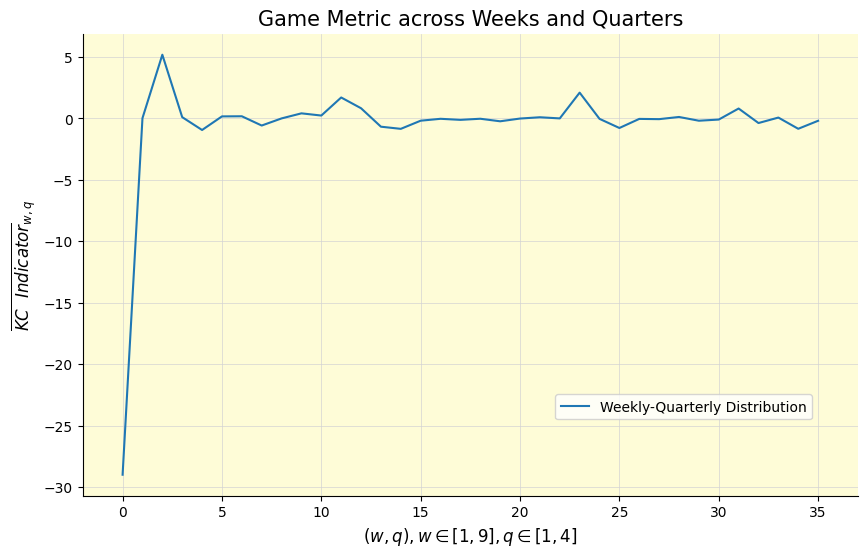

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(data)


plt.title('Game Metric across Weeks and Quarters', fontsize=15)
plt.xlabel('$ (w,q), w \in [1,9], q \in [1,4] $', fontsize=12)
plt.ylabel('$ \overline{KC\ \ Indicator} _{w,q} $', fontsize=12)
plt.grid(True, color='lightgray', linewidth=0.5, which='both', linestyle='-')
plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
ax.set_facecolor('#fefcd7')
ax.set_xlim([-2,37])
# ax.set_ylim([-30,30])
plt.legend(["Weekly-Quarterly Distribution"], loc='lower right', bbox_to_anchor = (0.95,0.15))
plt.savefig('analysis.png',dpi=300)
plt.show()

<hr>

#### For Hypothesis Testing

<hr>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

shapiro_test = stats.shapiro(data)
print('shapiro_test', shapiro_test.pvalue)

ks_test = stats.kstest(data,'norm')
print('ks_test', ks_test.pvalue)

shapiro_test 6.216453133506272e-12
ks_test 0.0246270740142418


In [17]:
stats.anderson(data, dist='norm')

AndersonResult(statistic=9.523352150265055, critical_values=array([0.528, 0.601, 0.721, 0.841, 1.   ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-0.6473296214900961, scale=4.974538633123566)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

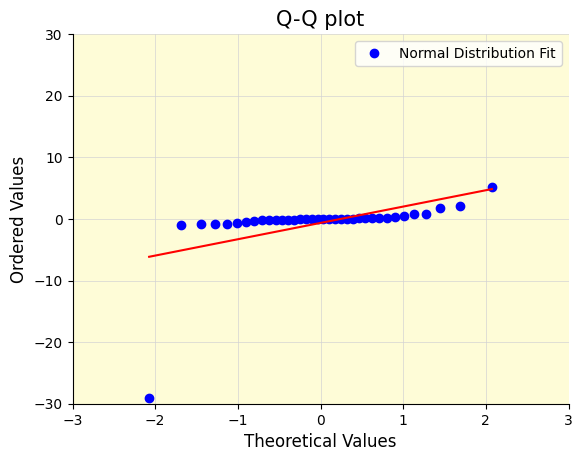

In [29]:
fig, ax = plt.subplots()
line = stats.probplot(data,dist='norm', plot=ax)

# print(x)
plt.title('Q-Q plot', fontsize=15)
plt.xlabel('Theoretical Values', fontsize=12)
plt.ylabel('Ordered Values', fontsize=12)
plt.grid(True, color='lightgray', linewidth=0.5, which='both', linestyle='-')
plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
ax.set_facecolor('#fefcd7')
ax.set_xlim([-3,3])
ax.set_ylim([-30,30])
plt.legend(["Normal Distribution Fit"])
plt.savefig('qq_plotN2.png',dpi=300)
plt.show()

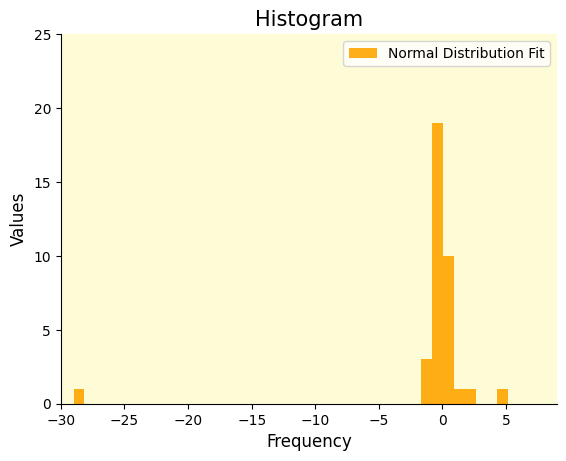

In [30]:
fig2, ax2 = plt.subplots()
plt.hist(data, bins=40, alpha=0.9,color='orange')

ax2.set_xlim([-30,9])
ax2.set_ylim([0,25])
ax2.set_facecolor('#fefcd7') #'#c8fecd')
plt.grid(False) 

plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)

plt.title('Histogram', fontsize=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Values', fontsize=12) #, color='blue')
plt.legend(['Normal Distribution Fit'])
plt.savefig('Histogram.png',dpi=300)

plt.show()

In [33]:
import numpy as np
from scipy.stats import norm
p0 = 0.5
pa = sum(np.abs(data)<1)/ len(data)
print(pa)
n = len(data)
print(n)

# SE of calculation
s = np.sqrt((p0*(1-p0))/n)
print(s)

# Z-score
z = (pa - p0) / s

pvalue = norm.sf(z)

z, pvalue

0.8888888888888888
36
0.08333333333333333


(4.666666666666666, 1.530626736531068e-06)

In [34]:
print('z-score',z,'p-value',pvalue)

z-score 4.666666666666666 p-value 1.530626736531068e-06


<hr>